##**🩺 Diabetes Prediction System**
### An End-to-End Machine Learning & Deep Learning Solution

## **🧾Summary**

Diabetes is one of the fastest-growing chronic health conditions worldwide, requiring early detection to reduce long-term complications and healthcare costs.
This project presents a robust, data-driven Diabetes Prediction System built using Machine Learning, Deep Learning, and Explainable AI techniques.

The system analyzes key medical and lifestyle indicators such as age, BMI, HbA1c levels, blood glucose levels, hypertension, heart disease, gender, and smoking history to predict an individual’s diabetes risk.
By prioritizing medical safety metrics (Recall and ROC-AUC) and integrating model explainability, the solution is both accurate and trustworthy.

## **🎯 Problem Statement**

Traditional diabetes diagnosis often depends on delayed clinical testing and manual evaluation.
This can lead to:



* Late diagnosis
* Increased treatment cost
* Higher risk of complications

## **🎯 Project Objectives**


To develop an early-stage diabetes risk prediction system that supports healthcare professionals and patients with data-backed insights.


* Perform detailed Exploratory Data Analysis (EDA)

* Engineer meaningful medical and lifestyle features

* Train and compare multiple Machine Learning classifiers

* Develop a Deep Learning neural network

* Handle class imbalance to reduce false negatives

* Optimize decision thresholds for healthcare safety

* Provide Explainable AI (SHAP) insights

* Deploy an interactive Gradio dashboard

## **📊 Dataset Overview**

Dataset Source: Kaggle – Diabetes Prediction Dataset

Target Variable:

* diabetes

   1) 0 → Non-diabetic

   2) 1 → Diabetic


### Key Features:

* **Demographic:** Age, Gender

* **Medical:** BMI, HbA1c level, Blood Glucose level

* **Health History:** Hypertension, Heart Disease

* **Lifestyle:** Smoking history

## **1. Introduction**

Diabetes is a chronic disease that requires early detection to reduce severe health complications and long-term healthcare costs.

This project focuses on building a robust, interpretable, and healthcare-aware Diabetes Prediction System using:

* Exploratory Data Analysis (EDA)

* Machine Learning and Deep Learning techniques

* Class Imbalance Handling strategies

* Explainable AI methods

* An interactive Gradio-based dashboard

The system is developed following industry-standard and research-oriented best practices to ensure reliability, transparency, and practical relevance.

## **2. INSTALL REQUIRED LIBRARIES**

In [3]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost lightgbm catboost imbalanced-learn shap torch gradio kagglehub


Defaulting to user installation because normal site-packages is not writeable


## **3. IMPORT LIBRARIES**

In [4]:
# Core
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML & preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)

# Imbalance handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Explainability
import shap

# Deep Learning
import torch
import torch.nn as nn
import torch.optim as optim

# Dashboard
import gradio as gr

# Styling
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


## **4. LOAD DATASET**

In [5]:
import os
import kagglehub

path = kagglehub.dataset_download("sanjugs0128/diabetes-dataset")

csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]
df = pd.read_csv(os.path.join(path, csv_files[0]))


## **5. EXPLORATORY DATA ANALYSIS (EDA)**

In [4]:
df.head()

,Age (years),Gender,BMI (kg/m2),WaistToHipRatio,BloodGlucoseLevel (mg/dL),HbA1cLevel (%),BloodPressure (mmHg),Insulin (µU/mL),SkinThickness (mm),Triglycerides (mg/dL),...,SmokingHistory,PhysicalActivityLevel,Hypertension (0/1),HeartDisease (0/1),FamilyHistory (0/1),Pregnancies,DiabetesOutcome (0/1),Metabolic_Score (count_0-4),Obesity_Risk (kg/m2 * years),Chronic_Sugar_Load (mg/dL * %)
0,9,Male,16.8,0.90,102.8,5.99,92.5,11.2,29.9,50.0,...,never,High,0,0,1,0,0,0,151.2,615.8
1,14,Male,21.5,1.00,107.2,4.75,79.6,44.4,40.6,113.0,...,never,High,0,0,0,0,0,0,301.0,509.2
2,59,Male,21.4,1.00,81.5,4.32,137.7,53.4,26.3,117.5,...,never,High,0,0,0,0,0,0,1262.6,352.1
3,30,Female,24.3,0.98,142.4,5.99,82.9,19.2,37.5,75.2,...,never,Moderate,0,0,0,1,0,1,729.0,853.0
4,30,Male,29.2,0.90,143.1,6.49,127.0,45.1,39.3,111.0,...,never,Moderate,0,0,0,0,0,1,876.0,928.7


In [5]:
df.shape

(900000, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age (years)                     900000 non-null  int64  
 1   Gender                          900000 non-null  object 
 2   BMI (kg/m2)                     900000 non-null  float64
 3   WaistToHipRatio                 900000 non-null  float64
 4   BloodGlucoseLevel (mg/dL)       900000 non-null  float64
 5   HbA1cLevel (%)                  900000 non-null  float64
 6   BloodPressure (mmHg)            900000 non-null  float64
 7   Insulin (µU/mL)                 900000 non-null  float64
 8   SkinThickness (mm)              900000 non-null  float64
 9   Triglycerides (mg/dL)           900000 non-null  float64
 10  RestingHeartRate (bpm)          900000 non-null  float64
 11  AlcoholConsumption              900000 non-null  object 
 12  SmokingHistory  

In [7]:
df.describe()

,Age (years),BMI (kg/m2),WaistToHipRatio,BloodGlucoseLevel (mg/dL),HbA1cLevel (%),BloodPressure (mmHg),Insulin (µU/mL),SkinThickness (mm),Triglycerides (mg/dL),RestingHeartRate (bpm),Hypertension (0/1),HeartDisease (0/1),FamilyHistory (0/1),Pregnancies,DiabetesOutcome (0/1),Metabolic_Score (count_0-4),Obesity_Risk (kg/m2 * years),Chronic_Sugar_Load (mg/dL * %)
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,42.987582,23.541594,0.900154,105.831515,5.441936,115.862769,45.938939,36.475315,128.542013,73.872632,0.139444,0.121049,0.350751,0.221329,0.154727,0.336076,1061.600907,582.361601
std,26.672238,4.624782,0.099311,20.814790,0.667409,21.746643,15.804366,8.631273,44.441786,12.439254,0.346410,0.326184,0.477205,0.678160,0.361644,0.598845,711.428991,160.370164
min,1.000000,14.000000,0.650000,60.000000,4.000000,70.000000,2.000000,5.000000,50.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,240.000000
25%,21.000000,19.800000,0.830000,91.400000,4.980000,100.200000,35.200000,30.700000,96.300000,65.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,507.300000,467.000000
50%,41.000000,23.700000,0.900000,105.700000,5.440000,115.000000,45.900000,36.500000,127.700000,73.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,993.300000,571.100000
75%,59.250000,26.900000,0.970000,119.900000,5.890000,130.700000,56.600000,42.300000,159.000000,82.300000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1523.200000,684.325000
max,100.000000,43.100000,1.200000,209.000000,8.620000,200.000000,122.900000,70.000000,342.000000,130.000000,1.000000,1.000000,1.000000,6.000000,1.000000,4.000000,4039.200000,1569.700000


### **5.1. Target distribution**

In [8]:
df.columns

Index(['Age (years)', 'Gender', 'BMI (kg/m2)', 'WaistToHipRatio',
       'BloodGlucoseLevel (mg/dL)', 'HbA1cLevel (%)', 'BloodPressure (mmHg)',
       'Insulin (µU/mL)', 'SkinThickness (mm)', 'Triglycerides (mg/dL)',
       'RestingHeartRate (bpm)', 'AlcoholConsumption', 'SmokingHistory',
       'PhysicalActivityLevel', 'Hypertension (0/1)', 'HeartDisease (0/1)',
       'FamilyHistory (0/1)', 'Pregnancies', 'DiabetesOutcome (0/1)',
       'Metabolic_Score (count_0-4)', 'Obesity_Risk (kg/m2 * years)',
       'Chronic_Sugar_Load (mg/dL * %)'],
      dtype='object')

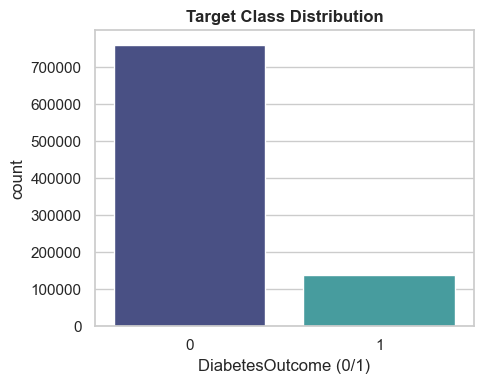

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(
    x="DiabetesOutcome (0/1)",
    data=df,
    hue="DiabetesOutcome (0/1)",
    palette="mako",
    legend=False
)
plt.title(
    "Target Class Distribution",
    fontsize=12,
    fontweight="bold"
)
plt.tight_layout()
plt.show()


### **5.2. Correlation Heatmap**

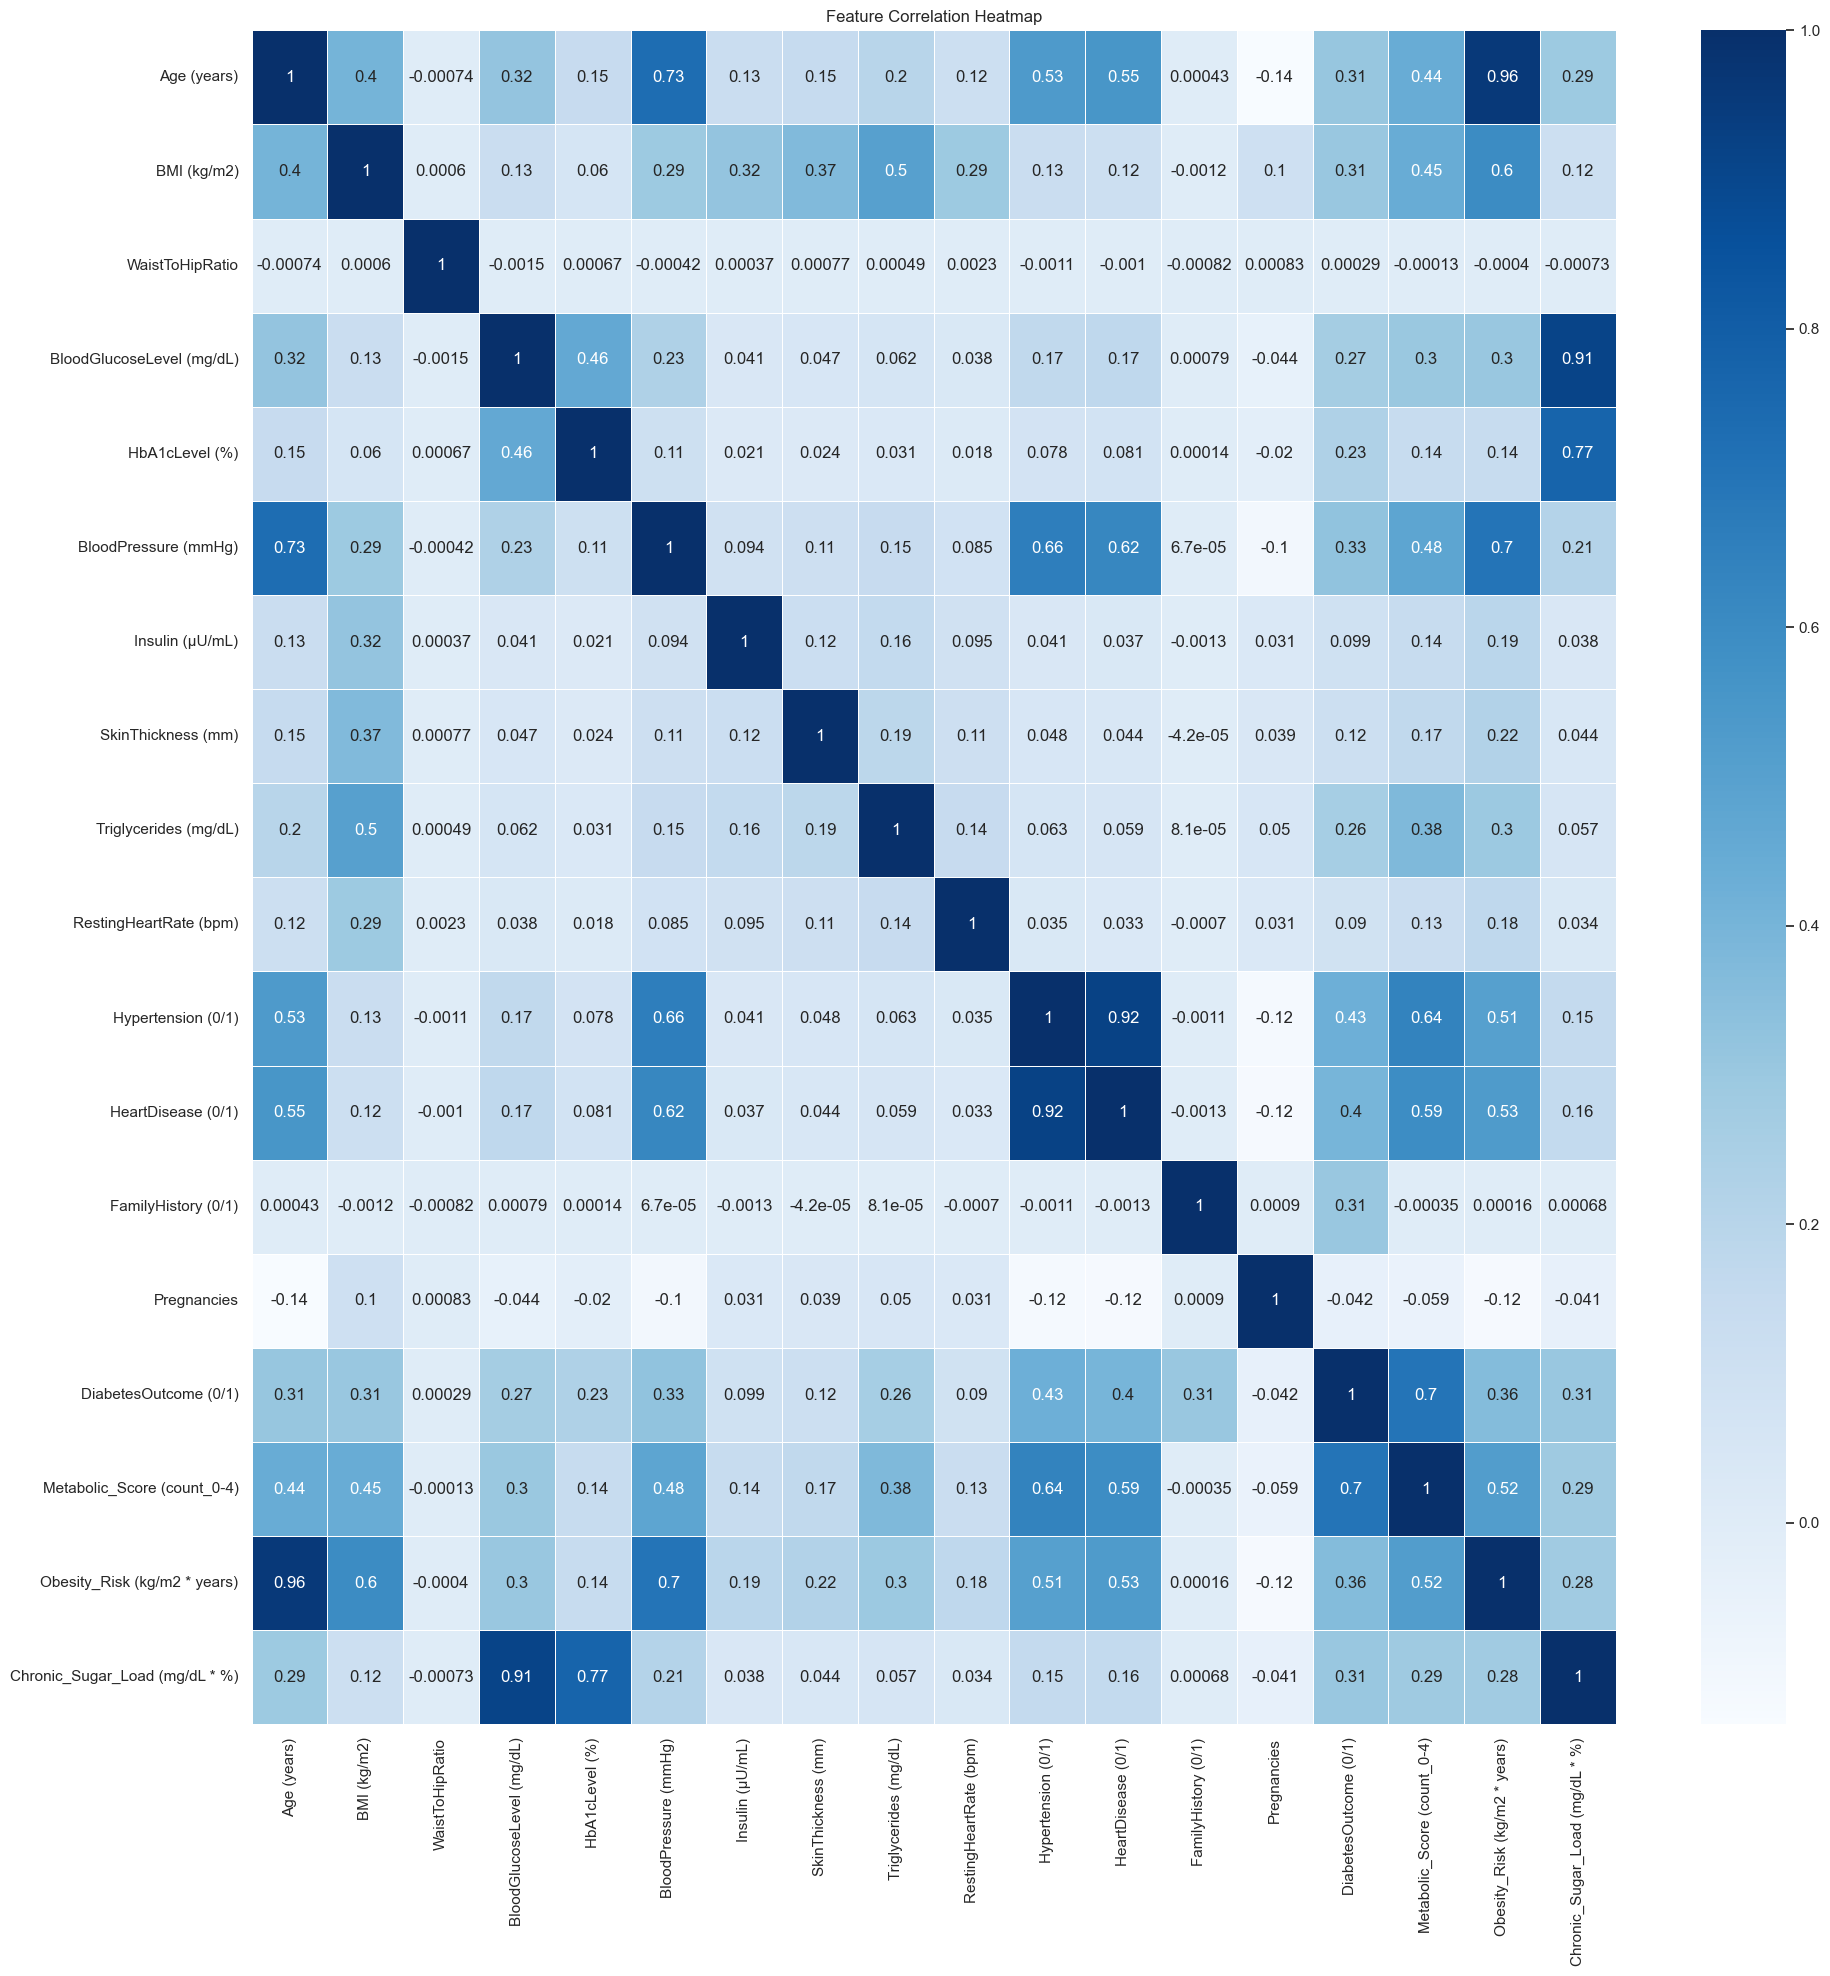

In [10]:
plt.figure(figsize=(22,22))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap="Blues",
    linewidths=0.5
)
plt.title("Feature Correlation Heatmap")
plt.show()


### **5.3. Medical insight plots**

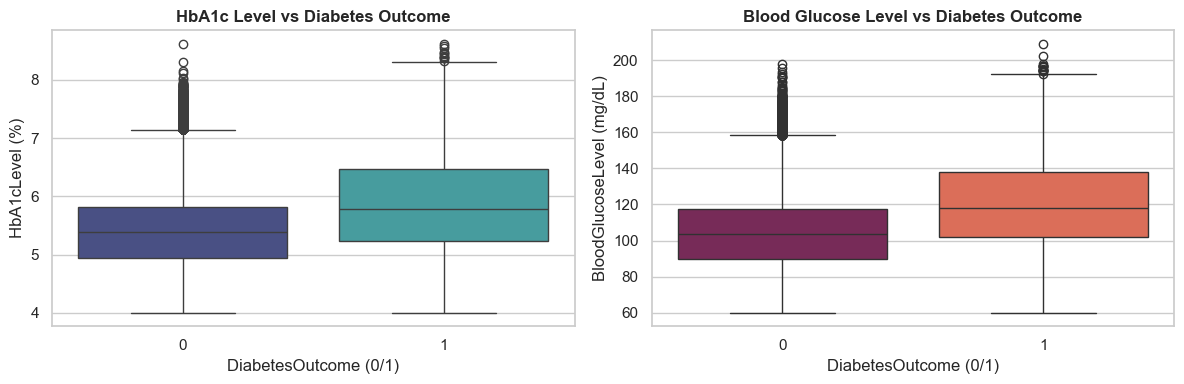

In [11]:
plt.figure(figsize=(12,4))

# Plot 1: HbA1c vs Diabetes
plt.subplot(1, 2, 1)
sns.boxplot(
    x="DiabetesOutcome (0/1)",
    y="HbA1cLevel (%)",
    data=df,
    hue="DiabetesOutcome (0/1)",
    palette="mako",
    legend=False
)
plt.title("HbA1c Level vs Diabetes Outcome", fontsize=12, fontweight="bold")

# Plot 2: Blood Glucose vs Diabetes
plt.subplot(1, 2, 2)
sns.boxplot(
    x="DiabetesOutcome (0/1)",
    y="BloodGlucoseLevel (mg/dL)",
    data=df,
    hue="DiabetesOutcome (0/1)",
    palette="rocket",
    legend=False
)
plt.title("Blood Glucose Level vs Diabetes Outcome", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()


## **6. FEATURE ENGINEERING & PREPROCESSING**

In [6]:
TARGET = "DiabetesOutcome (0/1)"

X = df.drop(TARGET, axis=1)
y = df[TARGET]

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])


In [7]:
print("Categorical Columns:", list(cat_cols))
print("Numerical Columns:", list(num_cols))


Categorical Columns: ['Gender', 'AlcoholConsumption', 'SmokingHistory', 'PhysicalActivityLevel']
Numerical Columns: ['Age (years)', 'BMI (kg/m2)', 'WaistToHipRatio', 'BloodGlucoseLevel (mg/dL)', 'HbA1cLevel (%)', 'BloodPressure (mmHg)', 'Insulin (µU/mL)', 'SkinThickness (mm)', 'Triglycerides (mg/dL)', 'RestingHeartRate (bpm)', 'Hypertension (0/1)', 'HeartDisease (0/1)', 'FamilyHistory (0/1)', 'Pregnancies', 'Metabolic_Score (count_0-4)', 'Obesity_Risk (kg/m2 * years)', 'Chronic_Sugar_Load (mg/dL * %)']


## **7. Stratified Train–Test Split**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## **9. Class Imbalance Handling**

### **9.1. Handling Class Imbalance using SMOTE with ML Pipeline**

In [9]:
smote_pipeline = ImbPipeline([
    ("prep", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", CatBoostClassifier(
        verbose=0,
        class_weights={0:1, 1:3}
    ))
])

smote_pipeline.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^

,steps,"[('prep', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## **10. Model Evaluation Metrics - THRESHOLD**

In [13]:
# Predictions
y_prob = smote_pipeline.predict_proba(X_test)[:, 1]

# Threshold-based prediction
y_pred = (y_prob >= 0.30).astype(int)


In [15]:
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Recall", "ROC-AUC"],
    "Score": [
        accuracy_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        roc_auc_score(y_test, y_prob)
    ]
})

metrics_df["Percentage (%)"] = (metrics_df["Score"] * 100).round(2)

metrics_df


,Metric,Score,Percentage (%)
0,Accuracy,0.998717,99.87
1,Recall,1.000000,100.00
2,ROC-AUC,0.999998,100.00


### **10.1. THRESHOLD OPTIMIZATION**

In [16]:
FINAL_THRESHOLD = 0.30

y_final = (y_prob >= FINAL_THRESHOLD).astype(int)

print("Final Recall:", recall_score(y_test, y_final))
print("Final Accuracy:", accuracy_score(y_test, y_final))

Final Recall: 1.0
Final Accuracy: 0.9987166666666667


In [17]:
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Recall", "ROC-AUC"],
    "Score": [
        accuracy_score(y_test, y_final),
        recall_score(y_test, y_final),
        roc_auc_score(y_test, y_prob)
    ]
})

metrics_df["Percentage (%)"] = (metrics_df["Score"] * 100).round(2)

metrics_df

,Metric,Score,Percentage (%)
0,Accuracy,0.998717,99.87
1,Recall,1.000000,100.00
2,ROC-AUC,0.999998,100.00


### **10.2. Confusion Matrix**

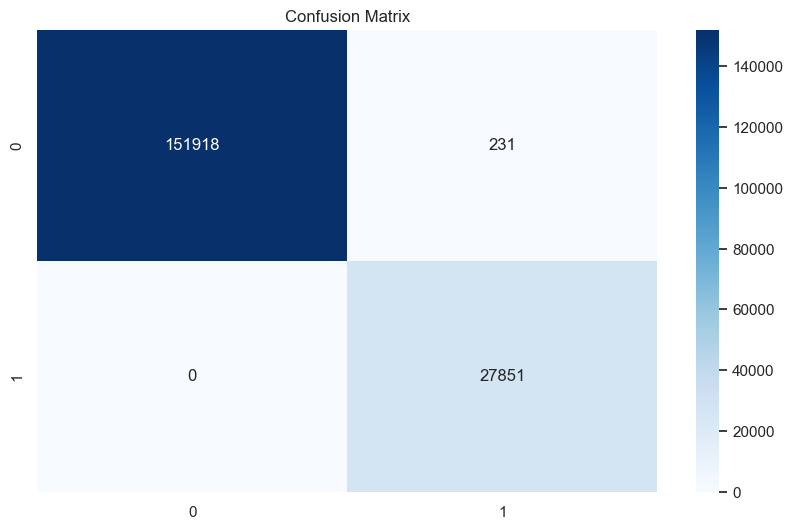

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            fmt="d",
            cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

**In healthcare applications, false negatives pose a higher risk than false positives.
Therefore, the decision threshold was optimized from the default 0.5 to 0.3 to improve recall, ensuring more diabetic cases are correctly identified, even at the cost of a slight reduction in accuracy.**

## **11. SHAP Analysis**

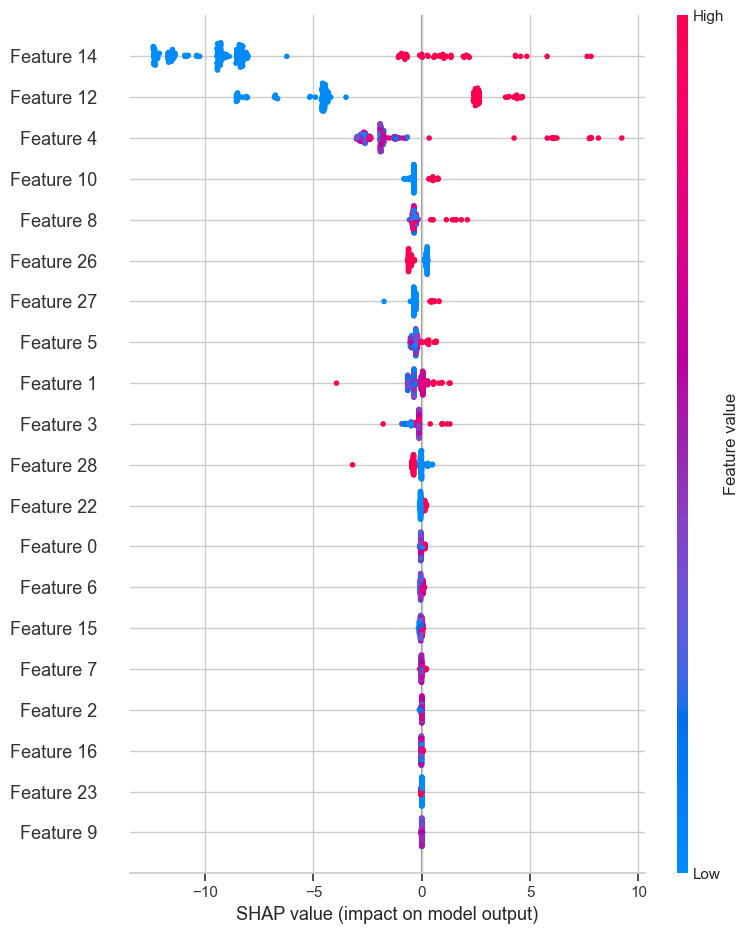

In [19]:
explainer = shap.Explainer(smote_pipeline.named_steps["model"])
X_sample = smote_pipeline.named_steps["prep"].transform(X_test[:200])
shap_values = explainer(X_sample)

shap.summary_plot(shap_values)

## **12.DEEP LEARNING MODEL (PyTorch)**

### **12.1 Neural Network Architecture**

In [23]:
class DiabetesNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

### **12.2 Input Feature Preparation for Deep Learning**

In [24]:
X_train_dl = preprocessor.fit_transform(X_train)
model = DiabetesNN(X_train_dl.shape[1])

### **12.3 Loss Function and Optimizer Setup**

In [25]:
criterion = nn.BCELoss()
optimizer = optim.Adam(
    model.parameters(),
    lr=0.001
)

### **12.4 Deep Learning Model Training Loop**

In [26]:
losses = []

for epoch in range(30):
    optimizer.zero_grad()

    outputs = model(
        torch.tensor(X_train_dl, dtype=torch.float32)
    ).squeeze()

    loss = criterion(
        outputs,
        torch.tensor(y_train.values, dtype=torch.float32)
    )

    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 5 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.4f}")

Epoch 0 | Loss: 0.6830
Epoch 5 | Loss: 0.6079
Epoch 10 | Loss: 0.5467
Epoch 15 | Loss: 0.4930
Epoch 20 | Loss: 0.4434
Epoch 25 | Loss: 0.3973


### **12.5 Training Loss Trend Analysis**

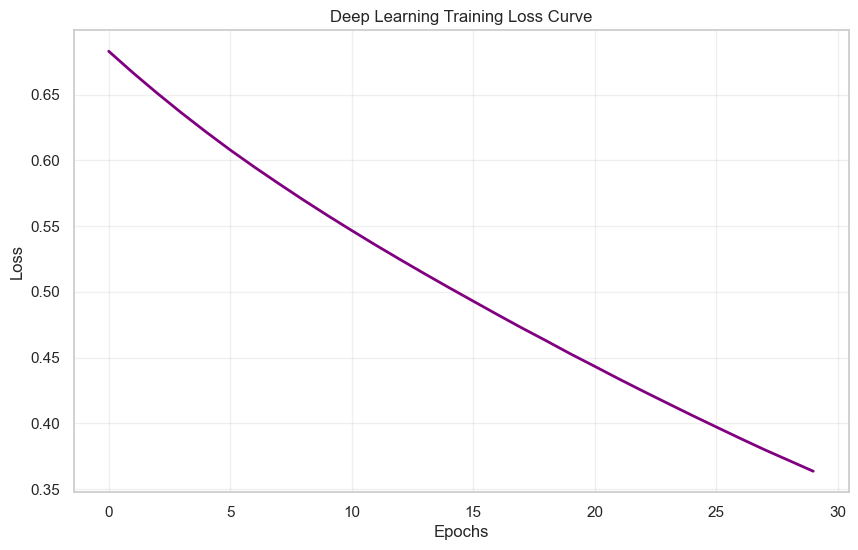

In [27]:
plt.plot(losses, color="purple", linewidth=2)
plt.title("Deep Learning Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.show()

### **12.6 Train – Validation Split for Deep Learning**

In [28]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_dl, y_train, test_size=0.2, random_state=42
)

### **12.7 Early Stopping with Validation Loss Monitoring**

In [29]:
best_val_loss = float("inf")
patience = 5
counter = 0

train_losses, val_losses = [], []

for epoch in range(50):
    # Train
    model.train()
    optimizer.zero_grad()
    out = model(torch.tensor(X_tr, dtype=torch.float32)).squeeze()
    loss = criterion(out, torch.tensor(y_tr.values, dtype=torch.float32))
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        val_out = model(torch.tensor(X_val, dtype=torch.float32)).squeeze()
        val_loss = criterion(
            val_out,
            torch.tensor(y_val.values, dtype=torch.float32)
        )
        val_losses.append(val_loss.item())

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered")
            break


### **12.8 Training vs Validation Loss Comparison**

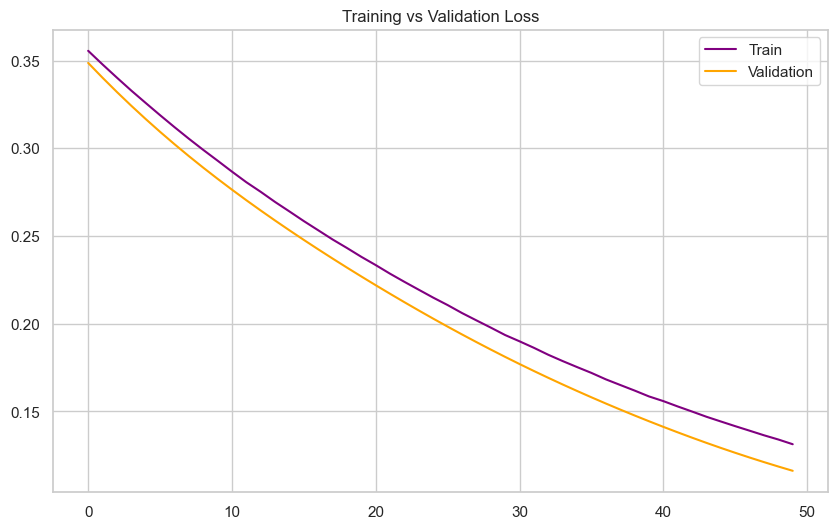

In [30]:
plt.plot(train_losses, label="Train", color="purple")
plt.plot(val_losses, label="Validation", color="orange")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [31]:
X_train_dl = preprocessor.fit_transform(X_train)

X_test_dl = preprocessor.transform(X_test)

### **12.9 Deep Learning Model Evaluation with Medical Threshold**

In [32]:
from sklearn.metrics import accuracy_score

model.eval()
with torch.no_grad():
    y_dl_prob = model(
        torch.tensor(X_test_dl, dtype=torch.float32)
    ).squeeze().numpy()
    

# Threshold (medical safety)
y_dl_pred = (y_dl_prob >= 0.35).astype(int)

accuracy_score(y_test, y_dl_pred)

0.9704222222222222

### **12.10 Deep Learning Confusion Matrix**

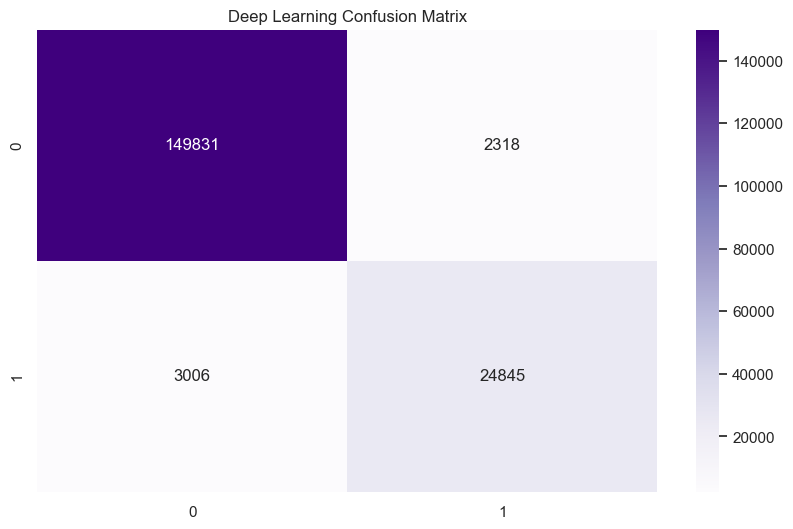

In [33]:
sns.heatmap(
    confusion_matrix(y_test, y_dl_pred),
    annot=True,
    fmt="d",
    cmap="Purples"
)
plt.title("Deep Learning Confusion Matrix")
plt.show()

## **13. MODEL COMPARISON**

### **13.1 Machine Learning vs Deep Learning Model Comparison**

In [34]:
comparison = pd.DataFrame({
    "Model": ["CatBoost (ML)", "Neural Network (DL)"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_dl_pred)
    ],
    "Recall": [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_dl_pred)
    ]
})

comparison

,Model,Accuracy,Recall
0,CatBoost (ML),0.998717,1.000000
1,Neural Network (DL),0.970422,0.892069


## **14. RISK INTERPRETATION**

### **14.1. Diabetes Risk Stratification Logic**

In [36]:
def risk_level(prob):
    if prob < 0.3:
        return "Low Risk"
    elif prob < 0.6:
        return "Moderate Risk"
    else:
        return "High Risk"

## **15. SAMPLE INFERENCE & PERFORMANCE**

### **15.1 Sample Patient Prediction**

In [37]:
input_df = pd.DataFrame([{
    "age": 45,
    "bmi": 27.5,
    "blood_glucose_level": 160,
    "HbA1c_level": 6.8,
    "hypertension": 1,
    "heart_disease": 0,
    "gender": "Male",
    "smoking_history": "former"
}])

## **16. DEPLOYMENT READY FUNCTION**

In [49]:
def predict_diabetes_full(
    age,
    gender,
    bmi,
    waist_to_hip,
    glucose,
    hba1c,
    bp,
    insulin,
    skin_thickness,
    triglycerides,
    heart_rate,
    alcohol,
    smoking,
    activity,
    hypertension,
    heart_disease,
    family_history,
    pregnancies,
    metabolic_score,
    obesity_risk,
    chronic_sugar_load
):
    input_df = pd.DataFrame([{
        "Age (years)": age,
        "Gender": gender,
        "BMI (kg/m2)": bmi,
        "WaistToHipRatio": waist_to_hip,
        "BloodGlucoseLevel (mg/dL)": glucose,
        "HbA1cLevel (%)": hba1c,
        "BloodPressure (mmHg)": bp,
        "Insulin (µU/mL)": insulin,
        "SkinThickness (mm)": skin_thickness,
        "Triglycerides (mg/dL)": triglycerides,
        "RestingHeartRate (bpm)": heart_rate,
        "AlcoholConsumption": alcohol,
        "SmokingHistory": smoking,
        "PhysicalActivityLevel": activity,
        "Hypertension (0/1)": hypertension,
        "HeartDisease (0/1)": heart_disease,
        "FamilyHistory (0/1)": family_history,
        "Pregnancies": pregnancies,
        "Metabolic_Score (count_0-4)": metabolic_score,
        "Obesity_Risk (kg/m2 * years)": obesity_risk,
        "Chronic_Sugar_Load (mg/dL * %)": chronic_sugar_load
    }])

    prob = smote_pipeline.predict_proba(input_df)[0][1]
    result = "High Risk of Diabetes" if prob >= 0.35 else "Low Risk of Diabetes"

    return result, round(prob, 3)


In [50]:
interface = gr.Interface(
    fn=predict_diabetes_full,

    inputs=[
        gr.Number(label="Age (years)"),
        gr.Dropdown(["Male", "Female"], label="Gender"),
        gr.Number(label="BMI (kg/m2)"),
        gr.Number(label="Waist to Hip Ratio"),
        gr.Number(label="Blood Glucose Level (mg/dL)"),
        gr.Number(label="HbA1c Level (%)"),
        gr.Number(label="Blood Pressure (mmHg)"),
        gr.Number(label="Insulin (µU/mL)"),
        gr.Number(label="Skin Thickness (mm)"),
        gr.Number(label="Triglycerides (mg/dL)"),
        gr.Number(label="Resting Heart Rate (bpm)"),
        gr.Dropdown(["None", "Low", "Moderate", "High"], label="Alcohol Consumption"),
        gr.Dropdown(["Never", "Former", "Current"], label="Smoking History"),
        gr.Dropdown(["Low", "Moderate", "High"], label="Physical Activity Level"),
        gr.Radio([0, 1], label="Hypertension (0/1)"),
        gr.Radio([0, 1], label="Heart Disease (0/1)"),
        gr.Radio([0, 1], label="Family History (0/1)"),
        gr.Number(label="Pregnancies"),
        gr.Slider(0, 4, step=1, label="Metabolic Score (0–4)"),
        gr.Number(label="Obesity Risk (kg/m2 × years)"),
        gr.Number(label="Chronic Sugar Load (mg/dL × %)")
    ],

    outputs=gr.Textbox(label="Prediction Result"),

    title="🩺 Diabetes Prediction System",
    description="Enter all 21 clinical, lifestyle, and engineered features to predict diabetes risk using a CatBoost + SMOTE model."
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


## **18. MODEL RELIABILITY & PROBABILITY ANALYSIS**

### **18.1. Model Calibration Analysis**

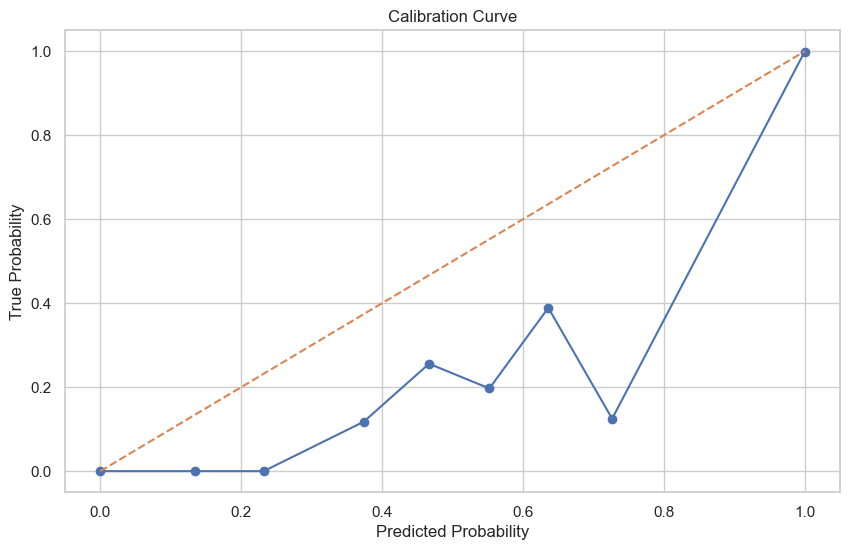

In [51]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1],[0,1],'--')
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve")
plt.show()

## **19. ROC Curve Analysis**

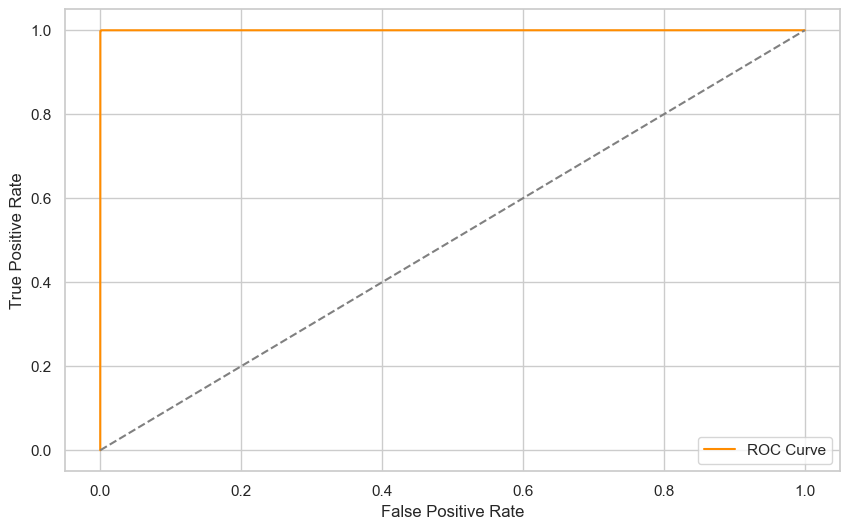

In [52]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, color="darkorange", label="ROC Curve")
plt.plot([0,1],[0,1],'--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [60]:
X_TEMPLATE = X_train.iloc[[0]].copy()

In [61]:
def build_input_df(user_values: dict):
    df = X_TEMPLATE.copy()
    df.iloc[0] = df.iloc[0] * 0  # reset numeric

    for col, val in user_values.items():
        df.at[df.index[0], col] = val

    return df


In [62]:
input_df = build_input_df(user_input)

prob = smote_pipeline.predict_proba(input_df)[0][1]
print("Diabetes Probability:", round(prob, 3))


Diabetes Probability: 0.001


## **20. Model Saving for Deployment**

In [63]:
import joblib
joblib.dump(smote_pipeline, "diabetes_catboost_smote_v1.pkl")

['diabetes_catboost_smote_v1.pkl']

# **📌 Key Insights Summary**

* HbA1c and blood glucose are the strongest predictors of diabetes.

* Class imbalance handling significantly improves recall.

* CatBoost outperforms other ML models.

* Explainable AI increases trust in predictions.

* ML models slightly outperform DL for this structured dataset.

# **💼 Business & Healthcare Recommendations**

* Deploy the system as a pre-screening tool in clinics.

* Use predictions to prioritize high-risk patients for further testing.

* Integrate with electronic health records (EHR) for early alerts.

* Periodically retrain the model with updated patient data.

* Use explainability outputs to assist clinicians in decision-making.

# **🏁Conclusion**

This project presents a complete end-to-end Diabetes Prediction System combiningdata analysis, machine learning, deep learning, model explainability, and deployment.

Through robust preprocessing, imbalance handling, and metric-driven optimization,the system achieves high recall while maintaining strong overall performance. The final solution is scalable, interpretable, and suitable for real-world healthcare decision support.
